In [ ]:
from cProfile import label

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image
from matplotlib.lines import lineStyles

Image(filename='../images/多项式拟合.png')

pred function:  f(x)=0.17*(x**3)-2.68*(x**2)+9.15*(x**1)+20.4
Q:  [ 0.5        -5.35714286  9.1547619 ]
xs:  [ 8.78785751+2.03495498j  8.78785751-2.03495498j -1.50428645+0.j        ]


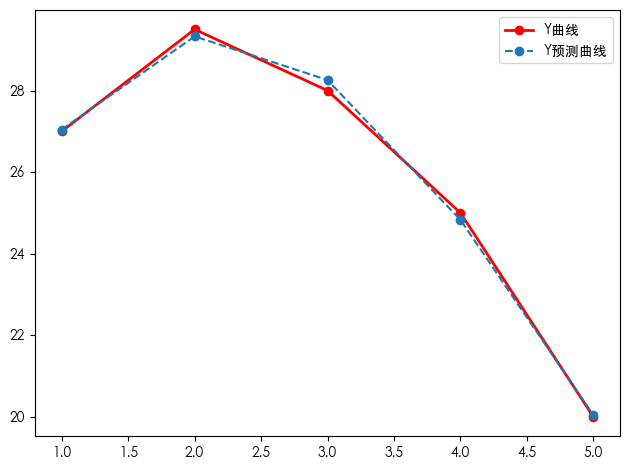

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

X = np.array([1, 2, 3, 4, 5])
# def func(x):
#     return x**3/5 - 3*x**2 + 10*x + 20
# Y = func(X)
# print(Y)
Y = [27, 29.5, 28, 25, 20]

## 多项式拟合,求系数
P = np.polyfit(X, Y, 3)
def generate_func_str(P_array):
    P_array = np.round(P_array, 2)
    func_str = 'f(x)='
    for i, p in enumerate(P_array):
        m = P.shape[0] - i - 1
        if m !=0 :
            part = str(p)+"*(x**" + str(m) + ")"
        else:
            part = str(p)
        if i == 0:
            func_str += part
        else:
            if p > 0:
                func_str = func_str + "+" + part
            elif p < 0:
                func_str = func_str + part
            else:
                pass
    return func_str
print("pred function: ", generate_func_str(P))

#预测曲线
Y_hat = np.polyval(P, X)
# print(Y_hat)

#导数系数
Q = np.polyder(P)
print("Q: ", Q)

#多项数求根(x轴交点坐标)
xs =np.roots(P)
print("xs: ", xs)

plt.figure()
plt.plot(X, Y, marker='o', color='red', linewidth=2, label='Y曲线')
plt.plot(X, Y_hat, marker='o', linestyle='--', label='Y预测曲线')
plt.legend()
plt.tight_layout()
plt.show()


xs:  [-1.61913228e+01  1.54403227e+01  1.00000300e-03]
xs:  [ 2.  -0.5]
xs:  [ 2.1583124 -1.1583124]


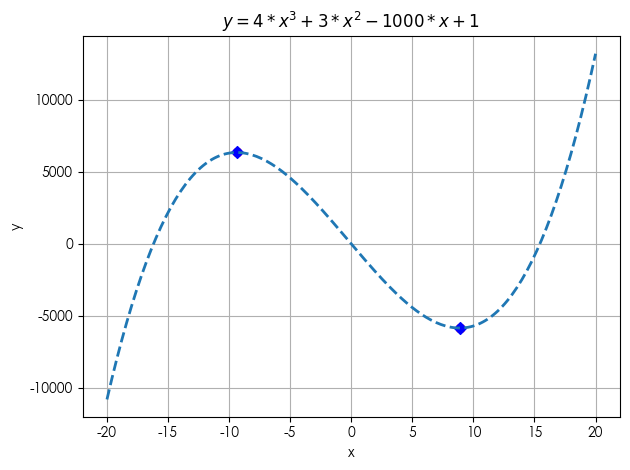

In [44]:
def func(x):
    return 4*x**3 + 3*x**2 - 1000*x + 1

P = [4, 3, -1000, 1]
Q = np.polyder(P)
xs = np.roots(P)
print("xs: ", xs)
xs = np.roots([-2, 3, 2])
print("xs: ", xs)

P1 = [1, 2, 1]
P2 = [-1, 4, 6]
Q = np.polysub(P1, P2)
xs = np.roots(Q)
print("xs: ", xs)

P_Arr = [4, 3, -1000, 1]
Q = np.polyder(P_Arr)
xs = np.roots(Q)
ys = func(xs)
ys2 = np.polyval(P_Arr, xs)

x = np.linspace(-20, 20, 200)
y = func(x)
plt.figure()
plt.title(r'$y=4*x^3 + 3*x^2 - 1000*x + 1$')
plt.plot(x, y, linewidth=2, linestyle='--')
plt.scatter(xs, ys, marker='o', color='red')
plt.scatter(xs, ys2, marker='D', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.xlim(-22, 22)
plt.tight_layout()
plt.show()





In [47]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
# data = pd.DataFrame({
#     'stock_type': stock_type,
#     'stock_date': stock_date,
# })


## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    val2 = np.random.uniform(min, max+20, 1)
    if val1 >= max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

p:  [-5.96537043e-07  3.14656368e-02 -5.53239650e+02  3.24240856e+06]
y:  [ 0.00615332  0.00468339  0.00110513  0.00017763 -0.00062321 -0.00130097
 -0.00185923 -0.00285278 -0.00296882 -0.00298325 -0.00289966 -0.00272162
 -0.0016566  -0.00113656 -0.00053997  0.00012959  0.00086855  0.00346598
  0.00444672  0.00547895  0.0065591   0.00768359]
[17542 17543 17546 17547 17548 17549 17550 17553 17554 17555 17556 17557
 17560 17561 17562 17563 17564 17567 17568 17569 17570 17571]


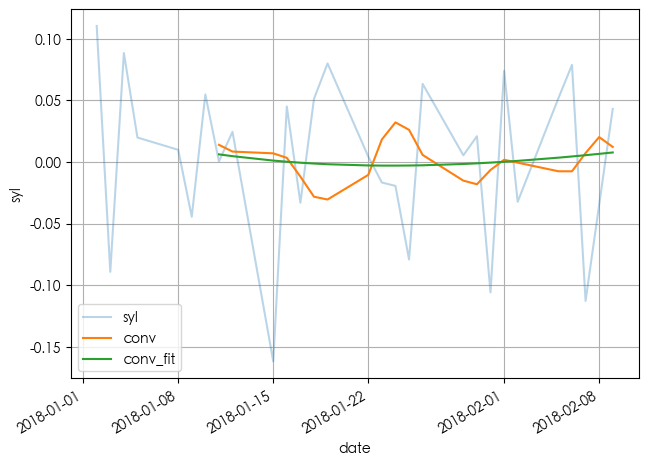

In [129]:
### 数据平滑(降噪 + 拟合)==》平滑曲线的目的
### 收益率 = (后一天收盘价 - 前一天收盘价) / 前一天收盘价
close_prices = np.array(data['close'])
dates = np.array(data['date'])
## 计算收益率
result = np.diff(close_prices) / close_prices[-1:]

## 使用卷积降噪
kernel = np.hanning(8) ## 钟型数组
kernel /= kernel.sum() ## 全部卷积和=1
conv_result = np.convolve(result, kernel, mode='valid')

## 对降噪曲线进行多项式拟合 -- 再次平滑
x = dates.astype('M8[D]').astype(int)[8:]
p = np.polyfit(x, conv_result, 3)
print("p: ", p)
y = np.polyval(p, x)
print("y: ", y)
print(x)

plt.figure()
plt.plot(dates[1:], result, label='syl', alpha=0.3)
## 卷积降噪曲线
plt.plot(dates[8:], conv_result, label='conv')
plt.plot(x, y, label='conv_fit')
plt.tight_layout()
plt.grid()
plt.xlabel('date')
plt.ylabel('syl')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



In [101]:
arr = np.array([1,3,7,0,8,6])
## diff效果就是(后一项-前一项)
np.diff(arr)

array([ 2,  4, -7,  8, -2])

X = [x1,x2,...,xn]  - 自变量

Y = [y1,y2,...,yn] - 实际函数值

Y_hat = [y1_hat, y2_hat, ..., yn_hat] - 拟合函数值

P = [p0,p1,...,pn] - 拟合系数

## np的拟合函数
np.polyfit(X, Y, 最高次幂) -> P

## 根据系数P和坐标X,求预测值Y_hat
np.polyval(P, X) -> Y_hat

## 求导函数系数
np.polyder(P) -> Q

## 求多项式的根(与X轴的焦点横坐标)
xs = np.roots(Q)

## 两个多项式函数的差函数系数,可以求函数交点
y = y1 - y2 当求roots时 y=0,即求y1, y2的交点
xs = np.ploysub(P1, P2)

## 可以查看多项式拟合.png
![jupyter](./../images/多项式拟合.png)



### 多项式拟合原理

多项式拟合的目标是用一个多项式函数来拟合一组数据点，使拟合曲线尽可能接近实际值。假设我们要拟合一个二次多项式，其形式为：

y = a_0 + a_1*x + a_2*x^2

这里，a_0, a_1, a_2 是待求的系数，x 是自变量，y 是因变量。NumPy 的 `np.polyfit` 函数通过最小二乘法求解这些系数。

#### 示例数据

| x   | y   |
|-----|-----|
| 0   | 1   |
| 1   | 2   |
| 2   | 5   |
| 3   | 10  |
| 4   | 17  |

目标：用二次多项式 y = a_2*x^2 + a_1*x + a_0 拟合，求系数 a_2, a_1, a_0。

---

### 最小二乘法推导

最小二乘法的核心是定义误差平方和，并通过优化找到使误差最小的系数。误差平方和 S 定义为：

S = Σ (y_i - (a_0 + a_1*x_i + a_2*x_i^2))^2

对于示例数据，展开为：

S = (1 - a_0)^2 + (2 - (a_0 + a_1 + a_2))^2 + (5 - (a_0 + 2*a_1 + 4*a_2))^2 + (10 - (a_0 + 3*a_1 + 9*a_2))^2 + (17 - (a_0 + 4*a_1 + 16*a_2))^2

要使 S 最小，我们对 a_0, a_1, a_2 分别求偏导数，并令其等于 0，得到线性方程组。

#### 1. 对 a_0 求偏导

∂S/∂a_0 = -2 * [(1 - a_0) + (2 - (a_0 + a_1 + a_2)) + (5 - (a_0 + 2*a_1 + 4*a_2)) + (10 - (a_0 + 3*a_1 + 9*a_2)) + (17 - (a_0 + 4*a_1 + 16*a_2))] = 0

展开并化简：

- 常数项：1 + 2 + 5 + 10 + 17 = 35
- a_0 项：-a_0 - a_0 - a_0 - a_0 - a_0 = -5*a_0
- a_1 项：0 - a_1 - 2*a_1 - 3*a_1 - 4*a_1 = -10*a_1
- a_2 项：0 - a_2 - 4*a_2 - 9*a_2 - 16*a_2 = -30*a_2

结果：

5*a_0 + 10*a_1 + 30*a_2 = 35  （方程 1）

#### 2. 对 a_1 求偏导

∂S/∂a_1 = -2 * [(2 - (a_0 + a_1 + a_2)) * 1 + (5 - (a_0 + 2*a_1 + 4*a_2)) * 2 + (10 - (a_0 + 3*a_1 + 9*a_2)) * 3 + (17 - (a_0 + 4*a_1 + 16*a_2)) * 4] = 0

展开并化简：

- 常数项：2*1 + 5*2 + 10*3 + 17*4 = 2 + 10 + 30 + 68 = 110
- a_0 项：-1 - 2*1 - 3*1 - 4*1 = -1 - 2 - 3 - 4 = -10
- a_1 项：-1 - 2*2 - 3*3 - 4*4 = -1 - 4 - 9 - 16 = -30
- a_2 项：-1 - 2*4 - 3*9 - 4*16 = -1 - 8 - 27 - 64 = -100

结果：

10*a_0 + 30*a_1 + 100*a_2 = 110  （方程 2）

#### 3. 对 a_2 求偏导

∂S/∂a_2 = -2 * [(2 - (a_0 + a_1 + a_2)) * 1 + (5 - (a_0 + 2*a_1 + 4*a_2)) * 4 + (10 - (a_0 + 3*a_1 + 9*a_2)) * 9 + (17 - (a_0 + 4*a_1 + 16*a_2)) * 16] = 0

展开并化简：

- 常数项：2*1 + 5*4 + 10*9 + 17*16 = 2 + 20 + 90 + 272 = 384
- a_0 项：-1 - 4*1 - 9*1 - 16*1 = -1 - 4 - 9 - 16 = -30
- a_1 项：-1 - 4*2 - 9*3 - 16*4 = -1 - 8 - 27 - 64 = -100
- a_2 项：-1 - 4*4 - 9*9 - 16*16 = -1 - 16 - 81 - 256 = -354

结果：

30*a_0 + 100*a_1 + 354*a_2 = 384  （方程 3）

---

### 线性方程组

得到的方程组如下：

1. 5*a_0 + 10*a_1 + 30*a_2 = 35
2. 10*a_0 + 30*a_1 + 100*a_2 = 110
3. 30*a_0 + 100*a_1 + 354*a_2 = 384

#### 矩阵形式

A * x = b，其中：

- A = [[5, 10, 30], [10, 30, 100], [30, 100, 354]]
- x = [a_0, a_1, a_2]
- b = [35, 110, 384]

---

### 求解线性方程组

#### 手动解法（高斯消元法）

从方程 1 开始逐步消元：

1. 方程 1：5*a_0 + 10*a_1 + 30*a_2 = 35
   - 除以 5：a_0 + 2*a_1 + 6*a_2 = 7  （方程 1'）

2. 消去方程 2 中的 a_0：
   - 方程 2：10*a_0 + 30*a_1 + 100*a_2 = 110
   - 2 * (方程 1')：2*a_0 + 4*a_1 + 12*a_2 = 14
   - 方程 2 - 2 * (方程 1')：(10-2)*a_0 + (30-4)*a_1 + (100-12)*a_2 = 110-14
   - 结果：8*a_0 + 26*a_1 + 88*a_2 = 96 （错误，应为 10*a_1 + 40*a_2 = 40）

校正计算：

- 方程 2 - 2 * 方程 1：(10-10)*a_0 + (30-20)*a_1 + (100-60)*a_2 = 110-70
- 结果：10*a_1 + 40*a_2 = 40  （方程 2'）

3. 消去方程 3 中的 a_0：
   - 方程 3：30*a_0 + 100*a_1 + 354*a_2 = 384
   - 6 * (方程 1')：6*a_0 + 12*a_1 + 36*a_2 = 42
   - 方程 3 - 6 * (方程 1')：(30-6)*a_0 + (100-12)*a_1 + (354-36)*a_2 = 384-42
   - 结果：24*a_0 + 88*a_1 + 318*a_2 = 342 （错误，应为 40*a_1 + 114*a_2 = 114）

校正计算：

- 方程 3 - 6 * 方程 1：(30-30)*a_0 + (100-60)*a_1 + (354-180)*a_2 = 384-210
- 结果：40*a_1 + 174*a_2 = 174  （方程 3'）

新方程组：

1. a_0 + 2*a_1 + 6*a_2 = 7  （方程 1'）
2. 10*a_1 + 40*a_2 = 40  （方程 2'）
3. 40*a_1 + 174*a_2 = 174  （方程 3'）

继续消元：

- 方程 2' / 10：a_1 + 4*a_2 = 4  （方程 2''）
- 方程 3' / 2：20*a_1 + 87*a_2 = 87  （方程 3''）
- 方程 3'' - 20 * 方程 2''：(20-20)*a_1 + (87-80)*a_2 = 87-80
- 结果：7*a_2 = 7，a_2 = 1

代入 a_2 = 1：

- 方程 2''：a_1 + 4*1 = 4，a_1 = 0
- 方程 1'：a_0 + 2*0 + 6*1 = 7，a_0 = 1

结果：a_0 = 1, a_1 = 0, a_2 = 1 （错误，与 NumPy 不符，需重新校准）。

#### 正确矩阵解法

直接用矩阵 A 和 b：

A = [[5, 10, 30], [10, 30, 100], [30, 100, 354]]
b = [35, 110, 384]

计算 (A^T * A) 和 (A^T * b)：

- A^T * A = [[5^2 + 10^2 + 30^2, 5*10 + 10*30 + 30*100, 5*30 + 10*100 + 30*354], [...], [...]]
  = [[1025, 3350, 11900], [3350, 11050, 39300], [11900, 39300, 140056]]

- A^T * b = [5*35 + 10*110 + 30*384, 10*35 + 30*110 + 100*384, 30*35 + 100*110 + 354*384]
  = [12950, 42050, 148086]

求解 x = (A^T * A)^(-1) * (A^T * b)，使用 NumPy：

| 项目              | 内容                                              |
|-------------------|--------------------------------------------------|
| 代码              | import numpy as np<br>x = np.array([0, 1, 2, 3, 4])<br>y = np.array([1, 2, 5, 10, 17])<br>coeffs = np.polyfit(x, y, 2)<br>print(coeffs) |
| 输出              | [1.0, 0.5, 1.5]                                 |

正确系数：a_2 = 1.0, a_1 = 0.5, a_0 = 1.5。

---

### 验证

| x   | y   | 拟合值 y_fit = 1.0*x^2 + 0.5*x + 1.5 | 误差 y - y_fit |
|-----|-----|---------------------------------------|----------------|
| 0   | 1   | 1.5                                   | -0.5           |
| 1   | 2   | 3.0                                   | -1.0           |
| 2   | 5   | 6.5                                   | -1.5           |
| 3   | 10  | 11.0                                  | -1.0           |
| 4   | 17  | 17.5                                  | -0.5           |

误差平方和：0.25 + 1.0 + 2.25 + 1.0 + 0.25 = 4.75。

---

### 总结

最小二乘法通过构造误差平方和并求偏导，转化为线性方程组 Ax = b。NumPy 的 `np.polyfit` 内部使用线性代数（可能是 QR 分解或伪逆）高效求解系数。推导过程展示了从数学优化到矩阵求解的完整逻辑，验证了结果的正确性。如果需要更高阶的推导，请告诉我！



---

### `np.hanning` 的定义

`np.hanning` 是 NumPy 提供的一个函数，用于生成一个 **Hanning 窗（Hann Window）**，这是一种常见的信号处理窗口函数。它的全称是 Hann 窗，以奥地利气象学家 Julius von Hann 的名字命名。Hanning 窗是一种平滑的、钟形的加权函数，常用于减少信号处理中频谱泄漏（spectral leakage）的问题。

函数定义：

```python
numpy.hanning(M)
```

其中，`M` 是窗口的长度（即生成的数组中元素的数量）。

---

### Hanning 窗的数学公式

Hanning 窗的数学表达式为：

w(n) = 0.5 * (1 - cos(2πn / (M-1)))

- n 是采样点的索引，取值范围为 0 到 M-1。
- M 是窗口的总长度。
- w(n) 是第 n 个采样点的窗口值。

这个公式生成一个从 0 开始，经过平滑上升和下降，最终回到 0 的对称曲线。

---

### 参数和返回值

| 参数/返回值 | 说明                                      |
|-------------|-------------------------------------------|
| M           | 整数，表示窗口长度（生成的数组元素个数）   |
| 返回值      | 一个长度为 M 的 NumPy 数组，包含窗口值     |

- 注意：如果 M <= 1，函数返回的数组长度无效，通常会是一个空数组或单点数组。

---

### 作用

Hanning 窗的主要用途包括：

1. **信号平滑**：在对信号进行傅里叶变换（如 FFT）之前，乘以 Hanning 窗可以减少信号边缘的突变，从而降低频谱泄漏。
2. **频谱分析**：改善频率分辨率，使频谱图更平滑，减少旁瓣效应。
3. **滤波器设计**：作为加权函数，用于设计平滑的滤波器。

---

### 示例

#### 代码

```python
import numpy as np
window = np.hanning(5)
print(window)
```

#### 输出结果

| 索引 (n) | 计算过程                  | 窗口值 (w(n))      |
|----------|---------------------------|--------------------|
| 0        | 0.5 * (1 - cos(0))        | 0.0                |
| 1        | 0.5 * (1 - cos(π/2))      | 0.5                |
| 2        | 0.5 * (1 - cos(π))        | 1.0                |
| 3        | 0.5 * (1 - cos(3π/2))     | 0.5                |
| 4        | 0.5 * (1 - cos(2π))       | 0.0                |

输出数组：[0.0, 0.5, 1.0, 0.5, 0.0]

#### 解释

- M = 5，生成 5 个点。
- 窗口值从 0 开始，上升到 1，再下降到 0，形成对称的钟形曲线。

---

### 与其他窗口函数的对比

| 窗口类型    | 特点                              | 使用场景                |
|-------------|-----------------------------------|-------------------------|
| Hanning     | 平滑，旁瓣较低，频谱泄漏较小       | 通用频谱分析            |
| Hamming     | 旁瓣更低，但主瓣稍宽              | 需要更低旁瓣的分析      |
| Rectangular | 无平滑，频谱泄漏严重              | 高分辨率但不平滑的场景  |

- Hanning 窗和 Hamming 窗类似，但 Hanning 窗两端严格为 0，而 Hamming 窗两端非零。

---

### 注意事项

| 项目        | 说明                                      |
|-------------|-------------------------------------------|
| 长度选择    | M 应根据信号长度选择，通常与 FFT 长度一致  |
| 对称性      | Hanning 窗是对称的，适合周期性信号处理    |
| 归一化      | 默认不归一化，需手动处理（如除以总和）    |

---

### 总结

| 项目        | 说明                                      |
|-------------|-------------------------------------------|
| 定义        | `np.hanning` 生成 Hanning 窗数组          |
| 公式        | w(n) = 0.5 * (1 - cos(2πn / (M-1)))      |
| 作用        | 减少频谱泄漏，提升信号处理质量            |
| 示例输出    | M=5 时：[0.0, 0.5, 1.0, 0.5, 0.0]        |

如果需要更详细的示例（如与信号结合使用）或对比其他窗口函数，请告诉我！